

In the world of data analysis and machine learning, one of the most critical tasks is the detection of outliers and anomalies in data. In this blog post, we'll explore how to use machine learning techniques to identify outliers and anomalies in data and provide code examples using Python. However, before we do any of that, it is important to define the ideas of anomalies and outliers statistically. Turns out, this is pretty ambiguous, so we will try to clear them up here:

- An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism, i.e. these are points that are inconsistent with the remainder of the dataset.
- An anomaly is an instance of data that occur very rarely in the dataset and one whose features differ significantly from most of the data and do not conform to a well-defined notion of normal behaviour.

In this article, we shall employ two elementary methods for outlier detection: The K-Nearest Neighbors (KNN) algorithm and the Isolation Forest algorithm.

## The K-Nearest Neighbor Algorithm For Outlier Detection

In the realm of supervised learning, the K-Nearest Neighbors (KNN) algorithm stands as a fundamental yet powerful method for classification and regression tasks. This algorithm, rooted in the concept of similarity, is intuitive, versatile, and widely employed across various domains. At its core, KNN is a non-parametric, lazy learning algorithm used for both classification and regression. It operates on the principle of proximity, where the class or value of an unseen data point is determined by the classes or values of its nearest neighbors in the training dataset.

Let us take a closer look at the inner working of the KNN algorithm. There are 3 main components of the KNN algorithm that we need to learn before we progress:

- For an unseen data point, the KNN computes its distance to all points in the training data. This distance maybe calculated using norms like euclidean norm, minkowski norm, manhattan norm, etc..
- Now the algorithm shall identify the K closest data points based on the calculated distances.
- It will then assign a class that is most common for the K neighbors.

Let us put theory to practice and use the ```scikit-learn``` to identify anomalies in the ```iris``` dataset.

In [1]:
# Imports

from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let us load the Iris dataset now.

In [2]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])


We shall now only use numeric data to make it easier on ourselves.

In [3]:
# Consider only numeric features for simplicity
numeric_data = data.drop('target', axis=1)

Lets now invoke the KNN algorithm and set our ```k``` to be equal to 5 and fit the algorithm on the numeric dataset that we have now. We will set our ```k``` to be equal to 5 in our case.

In [4]:
k = 5  # Number of neighbors
knn = NearestNeighbors(n_neighbors=k)
knn.fit(numeric_data)

NearestNeighbors()

Now, lets calculate the distance to the ```k``` neighbors

In [5]:
distances, indices = knn.kneighbors()

Let us see what the distances look like now:

In [6]:
distances

array([[0.1       , 0.14142136, 0.14142136, 0.14142136, 0.14142136],
       [0.14142136, 0.14142136, 0.14142136, 0.17320508, 0.2236068 ],
       [0.14142136, 0.24494897, 0.26457513, 0.26457513, 0.26457513],
       [0.14142136, 0.17320508, 0.2236068 , 0.24494897, 0.26457513],
       [0.14142136, 0.14142136, 0.17320508, 0.17320508, 0.2236068 ],
       [0.33166248, 0.34641016, 0.36055513, 0.37416574, 0.38729833],
       [0.2236068 , 0.26457513, 0.3       , 0.31622777, 0.31622777],
       [0.1       , 0.14142136, 0.17320508, 0.2       , 0.2236068 ],
       [0.14142136, 0.3       , 0.31622777, 0.34641016, 0.36055513],
       [0.1       , 0.17320508, 0.17320508, 0.17320508, 0.2       ],
       [0.1       , 0.28284271, 0.3       , 0.33166248, 0.33166248],
       [0.2236068 , 0.2236068 , 0.28284271, 0.3       , 0.3       ],
       [0.14142136, 0.17320508, 0.2       , 0.2       , 0.24494897],
       [0.24494897, 0.31622777, 0.34641016, 0.47958315, 0.5       ],
       [0.41231056, 0.46904158, 0.

Now we calculate outlier scores based on the distance metric.

In [7]:
outlier_scores = distances[:, -1]

Now, we shall set our threshold for the outliers. This can be adjusted accordingly, but for now, we shall keep our threshold at the 95th percentile.

In [8]:
threshold = np.percentile(outlier_scores, 95)

Now let's see what our outliers are.

In [9]:
outliers = np.where(outlier_scores > threshold)[0]

Now let's visualize the outliers that we have found so far:

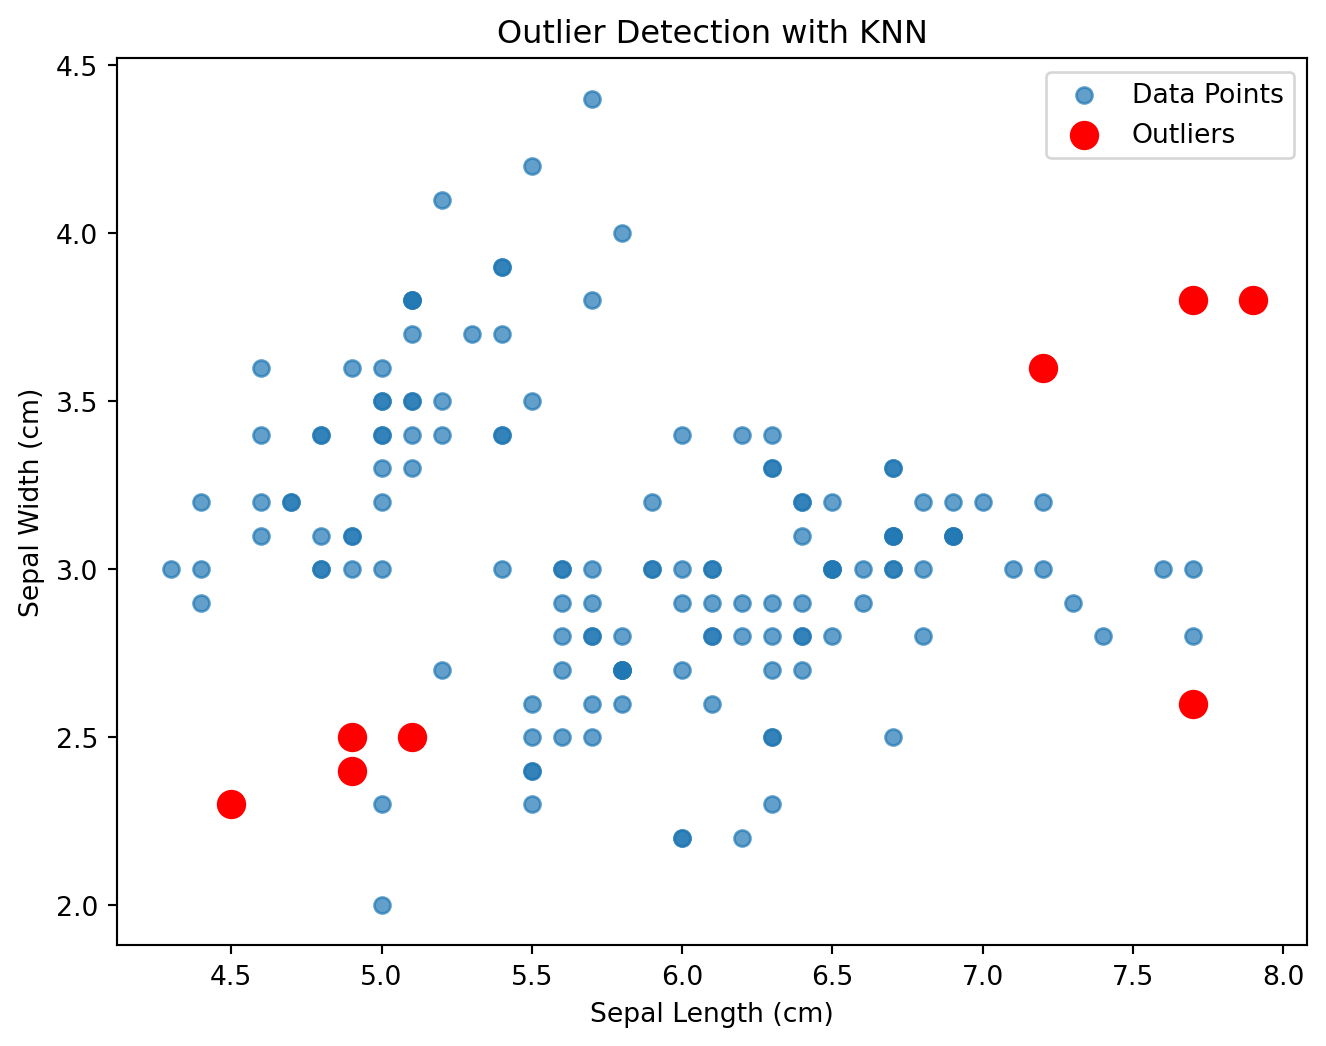

In [10]:

plt.figure(figsize=(8, 6))

plt.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], label='Data Points', alpha=0.7)
plt.scatter(numeric_data.iloc[outliers, 0], numeric_data.iloc[outliers, 1],
            c='r', s=100, label='Outliers')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Outlier Detection with KNN')
plt.legend()
plt.show()

## The Isolation Forest Algorithm For Anomalies

We now use the Isolation Forest algorithm for classifying anomalies. Developed by Liu, Ting, and Zhou in 2008, the IsolationForest algorithm stands out for its ability to efficiently isolate anomalies within a dataset. Unlike traditional distance or density-based methods, IsolationForest utilizes a tree-based structure to identify anomalies based on their isolation from the majority of data points.

The key concepts used in the Isolation Forest algorithm are:

- IsolationForest randomly selects features and splits data points, recursively creating isolation trees. This is called random partitioning.
- Anomalies are expected to have shorter path lengths in the trees, resulting in fewer partitions to be isolated.

The methodology for the Isolation Forest is as follows: First we select features and split the data points until they are isolated or a specific tree length is reached. Now we calculate the average path length to isolate each data point across multiple trees. Then, as mentioned before, shorter path lengths are considered to be anomalies.

Now, we shall put this theory into practice. Using the same dataset, we shall invoke an ```IsolationForest``` object to classify the numeric dataset.

In [11]:
from sklearn.ensemble import IsolationForest

# Create IsolationForest model
clf = IsolationForest()
clf.fit(numeric_data)

IsolationForest()

Lets see what are the outliers in the dataset.

In [12]:
outliers = clf.predict(numeric_data)

Now lets visualize the results:

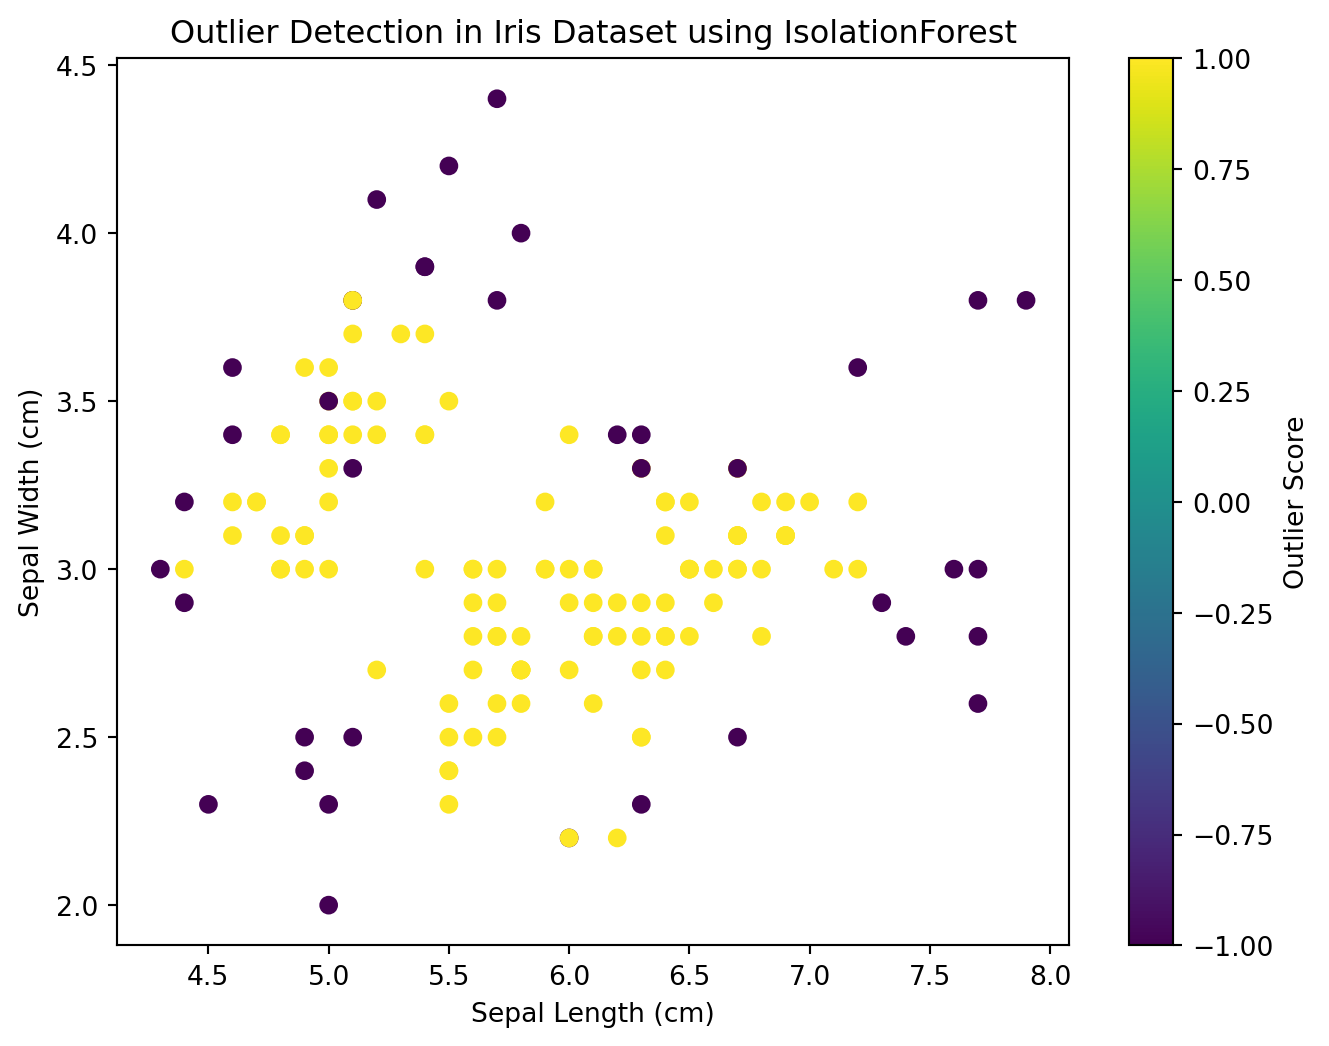

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], c=outliers, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Outlier Detection in Iris Dataset using IsolationForest')
plt.colorbar(label='Outlier Score')
plt.show()

Here darker shades represents higher outlier scores, which means they are definitely outliers.

Therefore, we have seen how we can perform outlier detection in python with these elementary algorithms and we have visualized the effectiveness of the algorithms.